In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- TotalCharges is object type hence convert to numerical

In [5]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

- check for missing value

In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

In [7]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [8]:
df['TotalCharges']=df['TotalCharges'].fillna(0)

In [9]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [10]:
numeric_cols=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

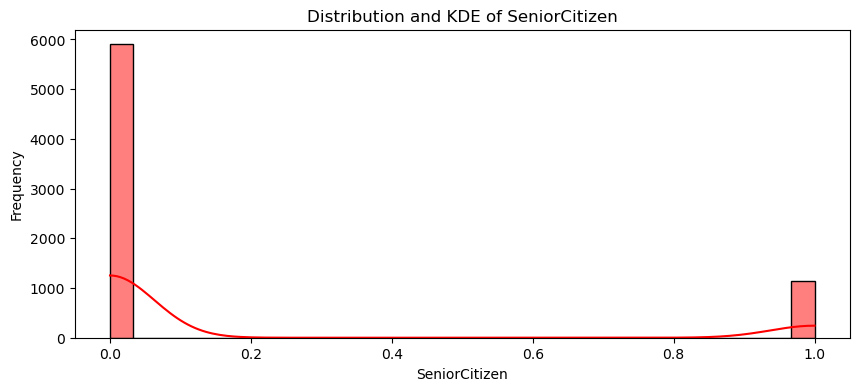

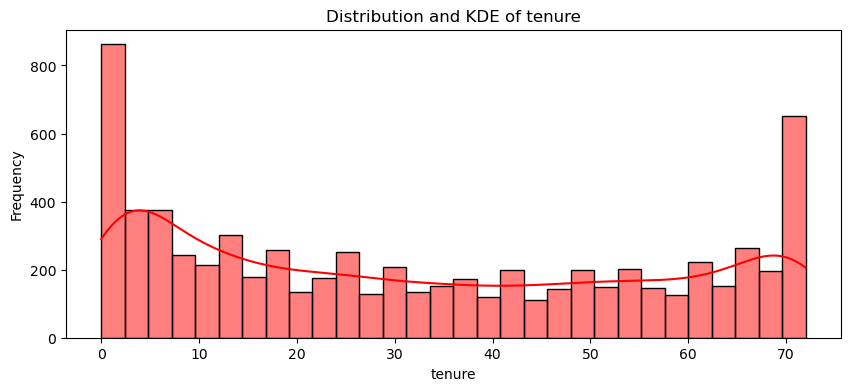

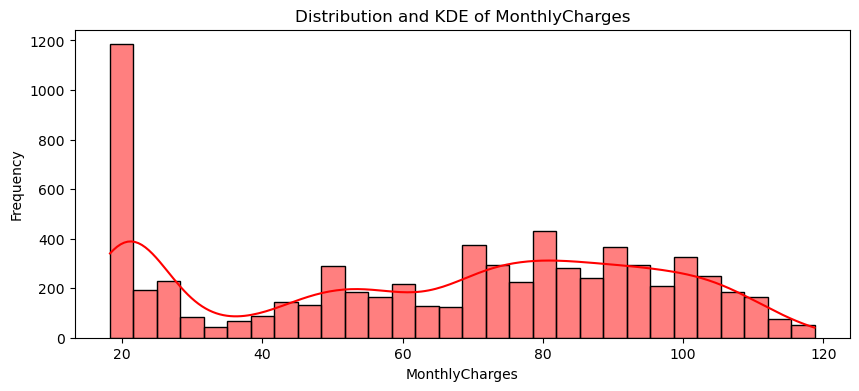

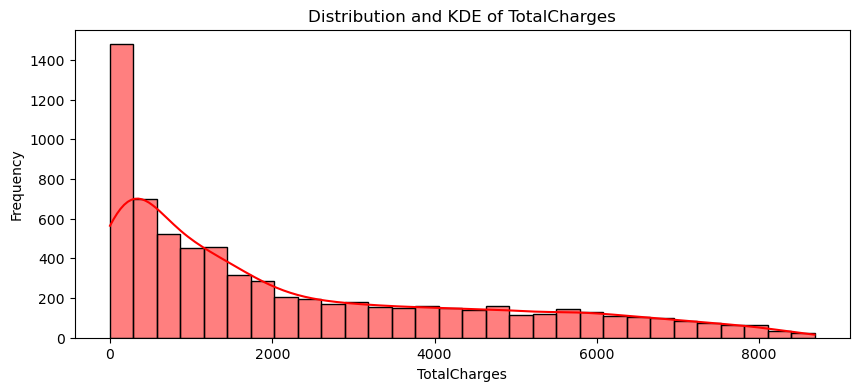

In [11]:
for col in numeric_cols: 
    plt.figure(figsize=(10,4))
    sns.histplot(df[col].dropna(),kde=True,bins=30,color='red') 
    plt.title(f"Distribution and KDE of {col}")
    plt.xlabel(col) 
    plt.ylabel("Frequency")
    plt.show()

### Observations

#### Tenure
- High frequency at **low tenure** indicates that the company is successful in acquiring new customers.  
- However, it could also **hide a high early churn rate** if many new customers leave shortly after joining.  
- Low frequency at **high tenure** suggests that **few customers stay long-term**, indicating potential retention challenges.  

#### MonthlyCharges
- There is a **peak at low monthly charges**.  
- Different **customer groups exhibit different churn drivers**, implying the need for segment-specific retention strategies.  

#### TotalCharges
- The distribution is **right-skewed**.  
- There is a **strong correlation between TotalCharges and Tenure**.  
- A **high peak near 0** represents **new customers with low tenure and low TotalCharges**.  
- The **long tail** indicates **few high-value, long-term customers**.  
- Understanding this distribution can help **define what qualifies as a high-value customer** for **targeted retention efforts**.  


In [12]:
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()

In [13]:
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

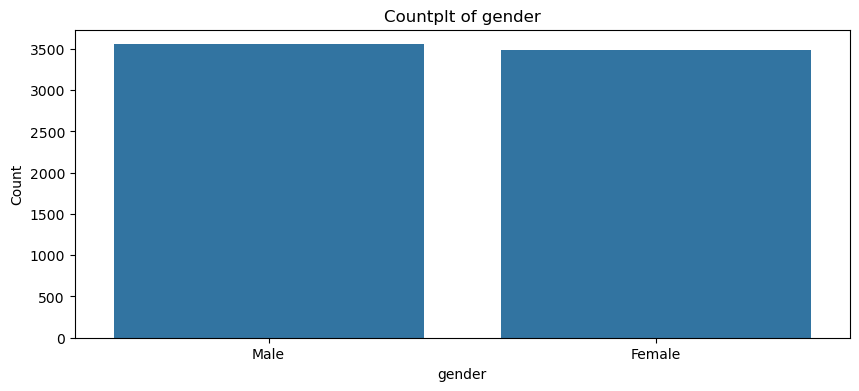

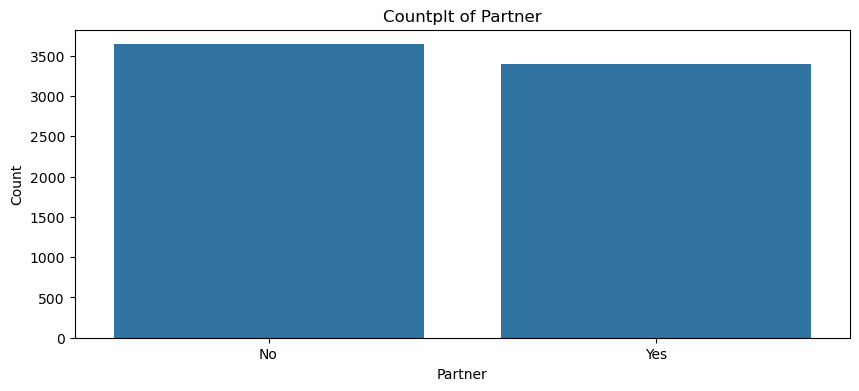

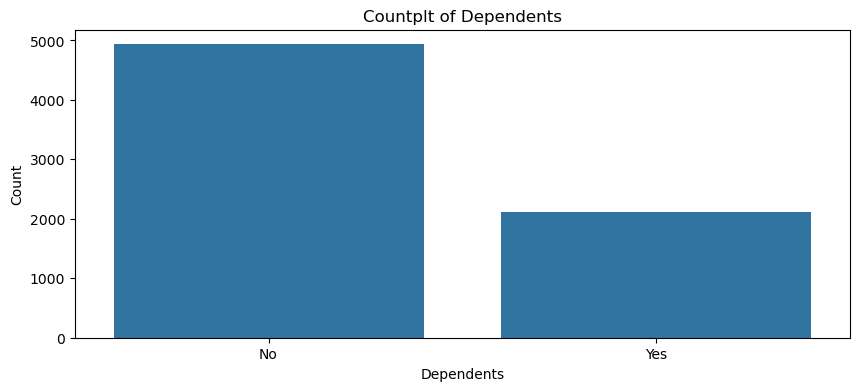

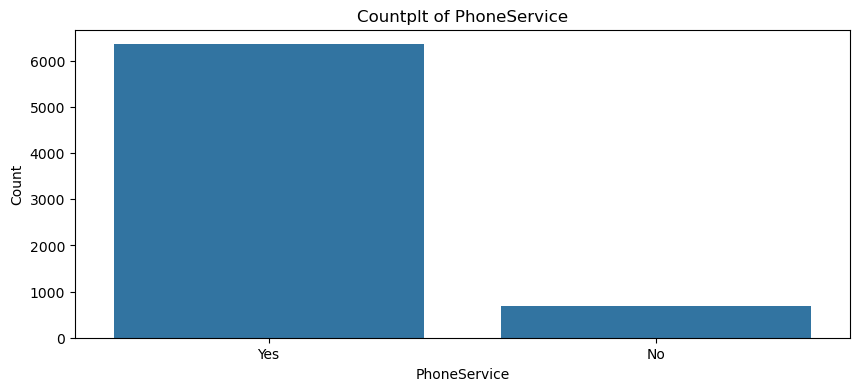

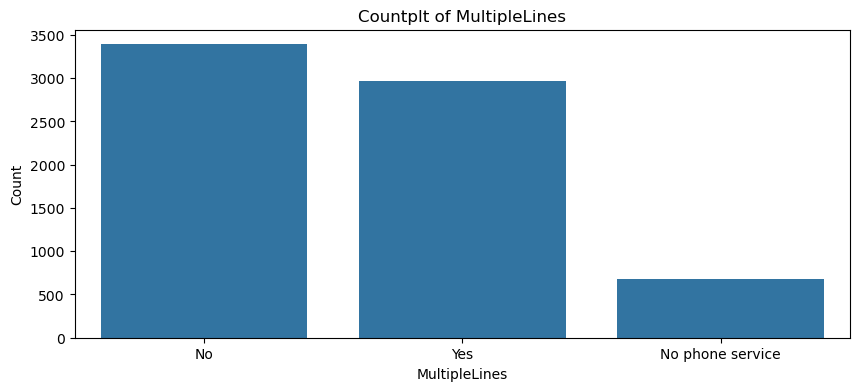

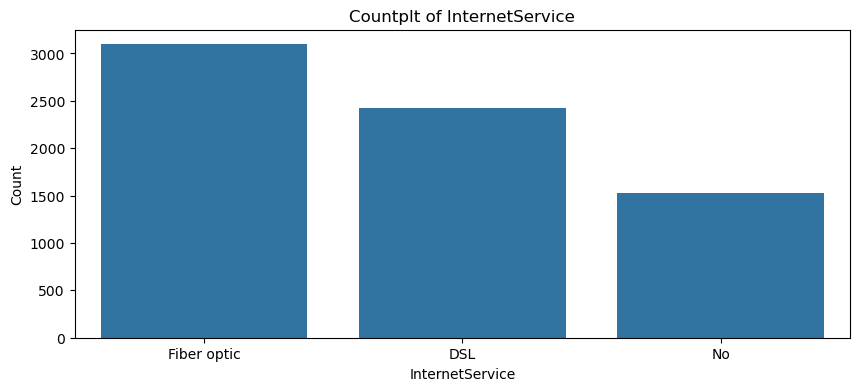

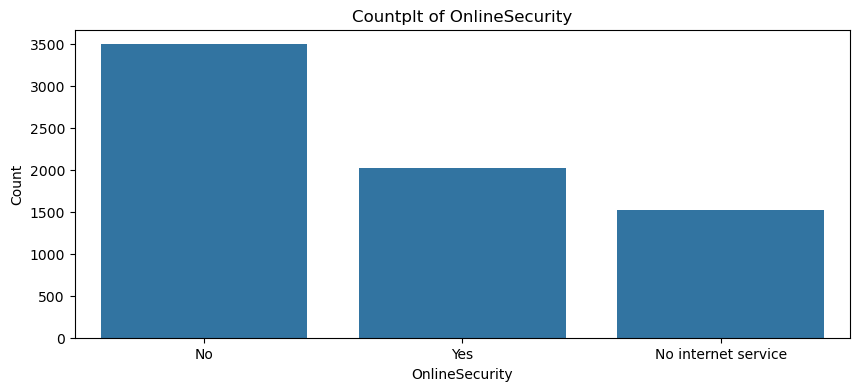

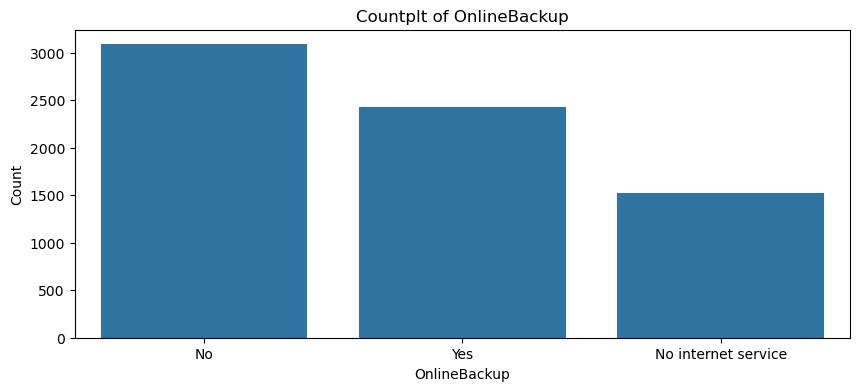

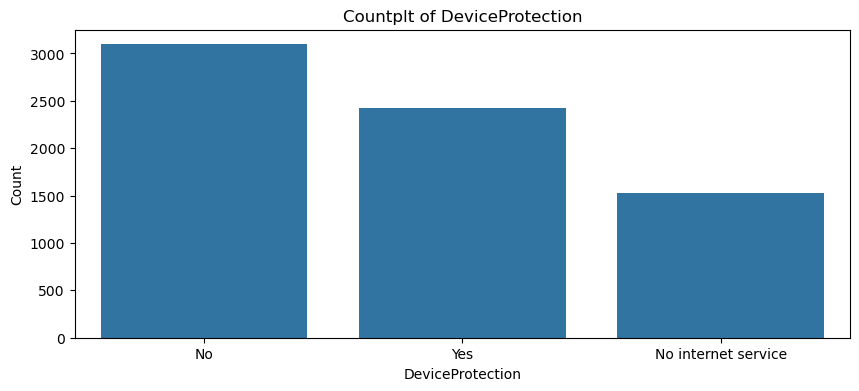

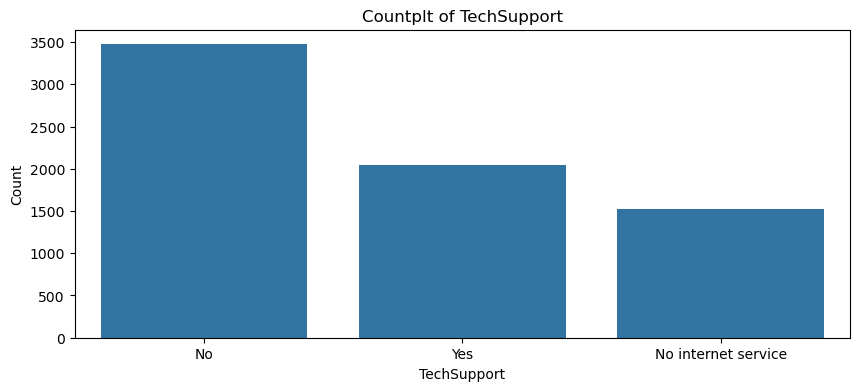

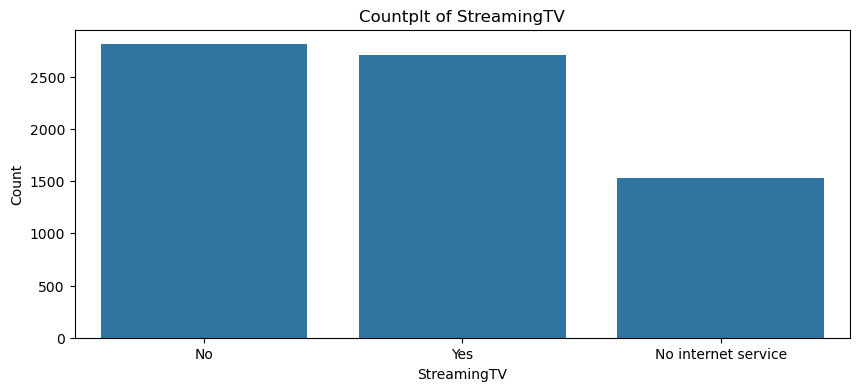

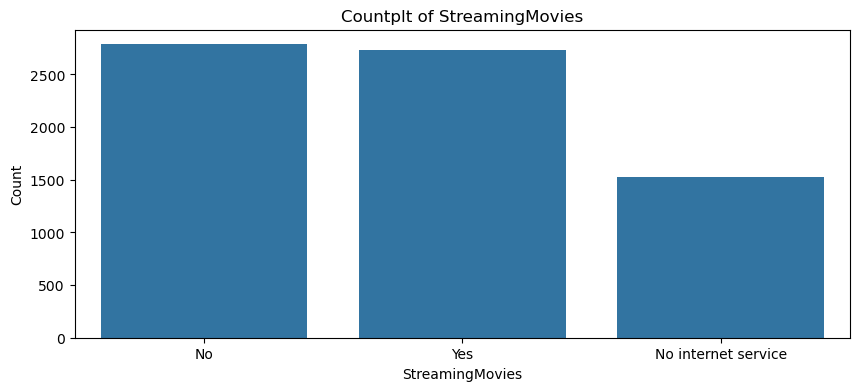

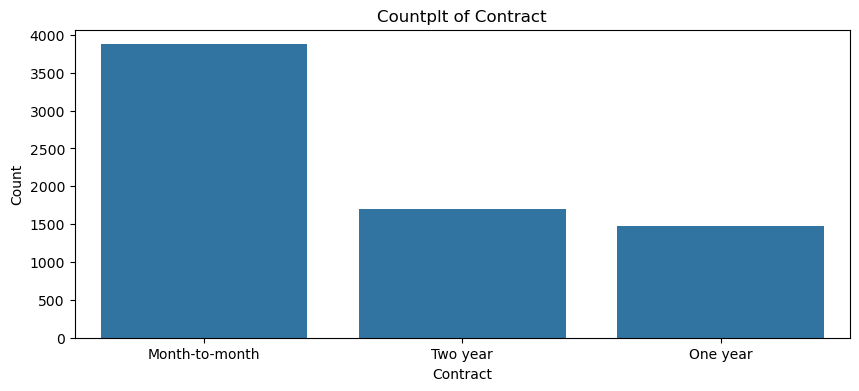

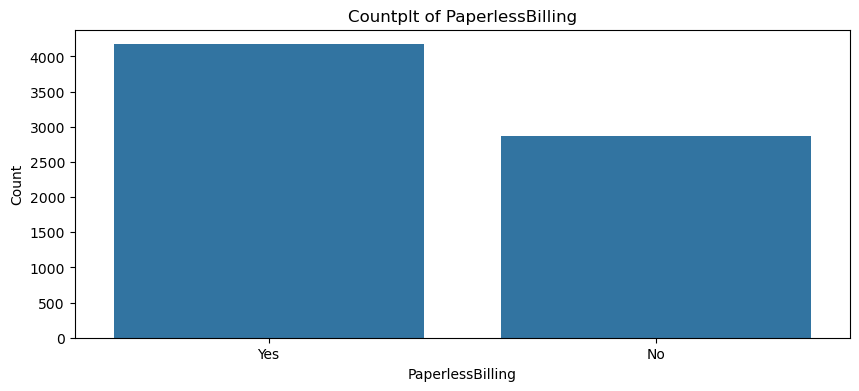

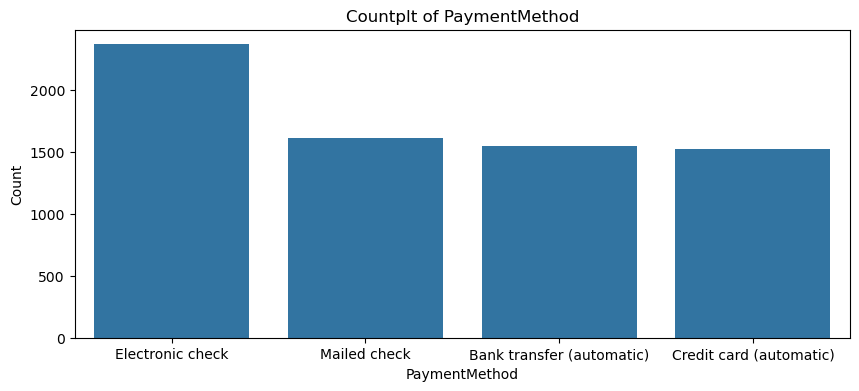

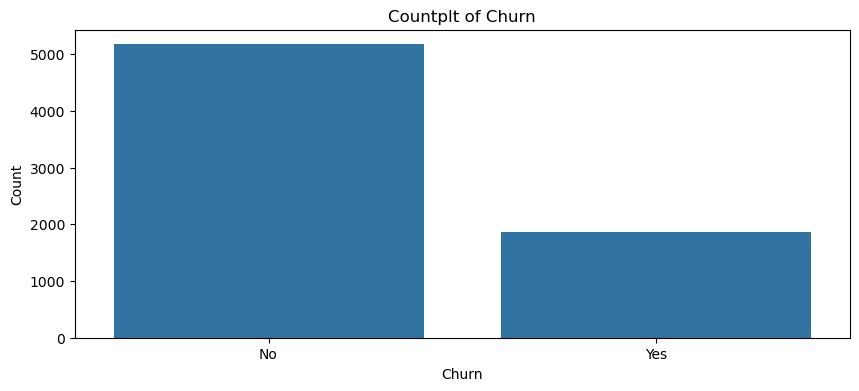

In [14]:
for col in categorical_cols: 
    plt.figure(figsize=(10,4))
    sns.countplot(data=df,x=col,order=df[col].value_counts().index)
    plt.title(f"Countplt of {col}")
    plt.xlabel(col) 
    plt.ylabel("Count")
    plt.show()

plt.close("all")

### Observations on Churn Drivers

#### Demographics
- **Gender** may not affect churn due to a **balanced customer base**.  
- **Partner status** also shows **no significant impact** on churn.  
- A larger share of customers **without dependents** likely indicates **younger, more mobile, and less loyal segments**, correlating with **higher churn**.  

#### Services and Features
- **Phone service** is a **basic utility**, so it does **not strongly influence churn**.  
- Customers with **multiple lines** may represent **higher-value segments**.  
- **Fibre optic customers** value high-speed internet but face **higher churn risk** due to **greater cost and competition**.  
- **Online security** likely **does not drive churn**, as it is **limited to internet service users**.  
- **Online backup** is not a strong differentiator, but subscribed customers often **show higher retention** due to **increased service dependency**.  
- **Device protection** is **less popular** among customers.  
- **Streaming TV and movies** are correlated with **fibre internet**, which may **increase monthly charges** and **raise churn probability**.  

#### Contract and Payment Behavior
- **Month-to-month contracts** are **most prone to churn**, while **yearly contracts** show **lower churn due to lock-in**.  
- **Paperless billing** combined with **electronic payments** may **increase churn**, reflecting **lower commitment**.  
- **Electronic check users** — often **budget-conscious customers** — show **higher churn**.  
- **Credit card** and **bank transfer** users tend to be **more stable and loyal** segments.  

#### Overall Churn Metrics
- Around **5,000 customers did not churn**, while **2,000 customers churned**.  
- **Churn rate ≈ 28–30%**, typical for Telco datasets.  
- This represents a **significant business loss**, emphasizing the need for **targeted retention strategies**.


## High-Level Interpretation
- The company serves a **balanced demographic**, indicating churn is **behavior-driven**, not **demographic-driven**.  
- **High dependence on month-to-month contracts**, **electronic check payments**, and **fibre service customers** are likely **major churn drivers**.  
- Customers **without additional services** (e.g., security, backup, tech support, streaming) are **less engaged** and **more likely to churn**.  
- A **majority without dependents** points to a **younger, more switch-prone population**.  

## Business Implications

### Targeted Retention for High-Risk Segments
- **Fibre customers**  
- **Electronic check users**  
- **Month-to-month customers**  
- **Customers with minimal add-on services**  

### Upselling Opportunities
- Offer **bundled packages** (security + backup + tech support).  
- Introduce **discounted multi-line plans**.  
- **Upgrade DSL users to fibre** with **long-term discounts**.  

### Encourage Long-Term Contracts
- **Incentivize 1-year and 2-year plans** to **significantly reduce churn**.  

### Improve Customer Experience
- Focus on improving **service quality and pricing** for **fibre-optic users**, who have **higher churn risk** due to **cost or performance concerns**.  


- mapping Yes to 1 and No to 0

In [15]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [16]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

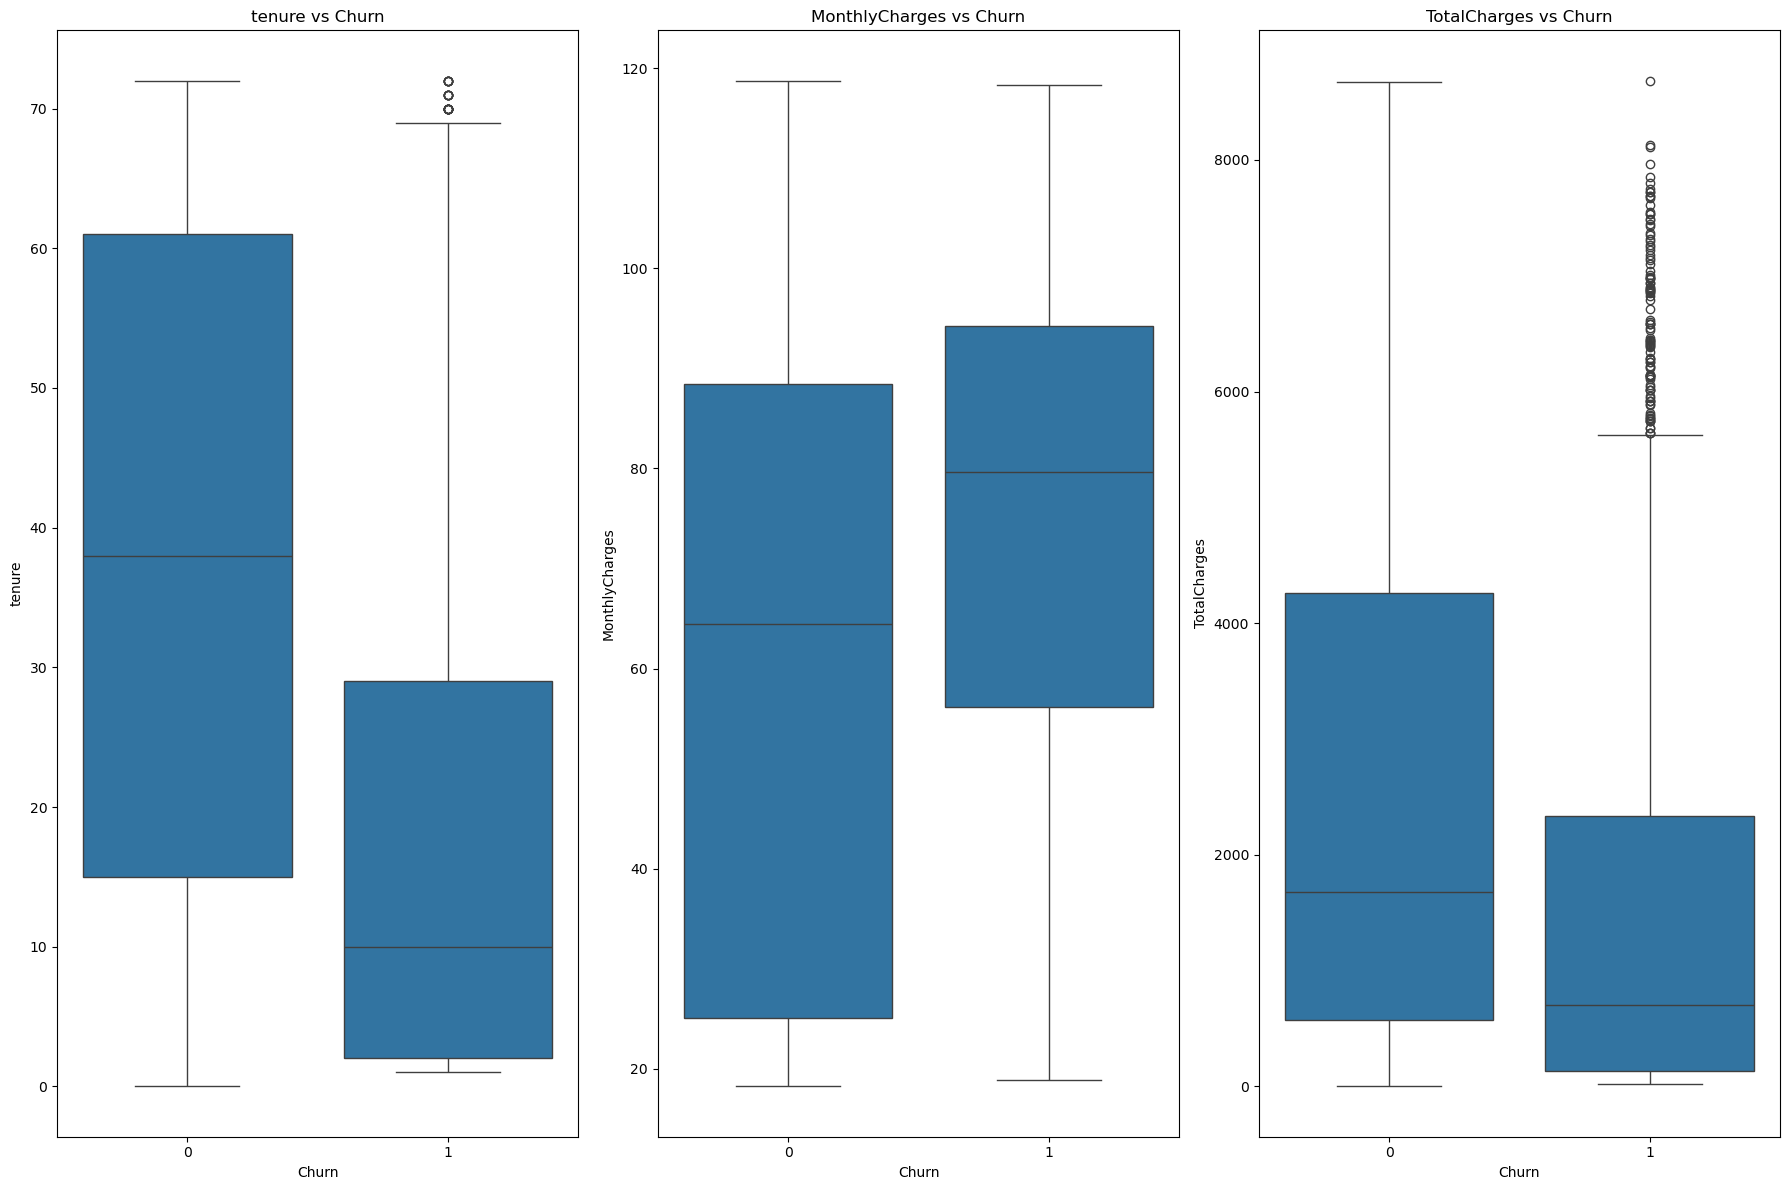

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
axes = axes.ravel()

numeric_cols=['tenure','MonthlyCharges','TotalCharges']
for i,col in enumerate(numeric_cols): 
    sns.boxplot(data=df,x='Churn',y=col,ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


### Key Insights on Churn Factors
- The **majority of churn** occurred among customers with **low tenure**, indicating early-stage drop-offs.  
- **High monthly charges** also contributed significantly to churn, suggesting **price sensitivity** among customers.  


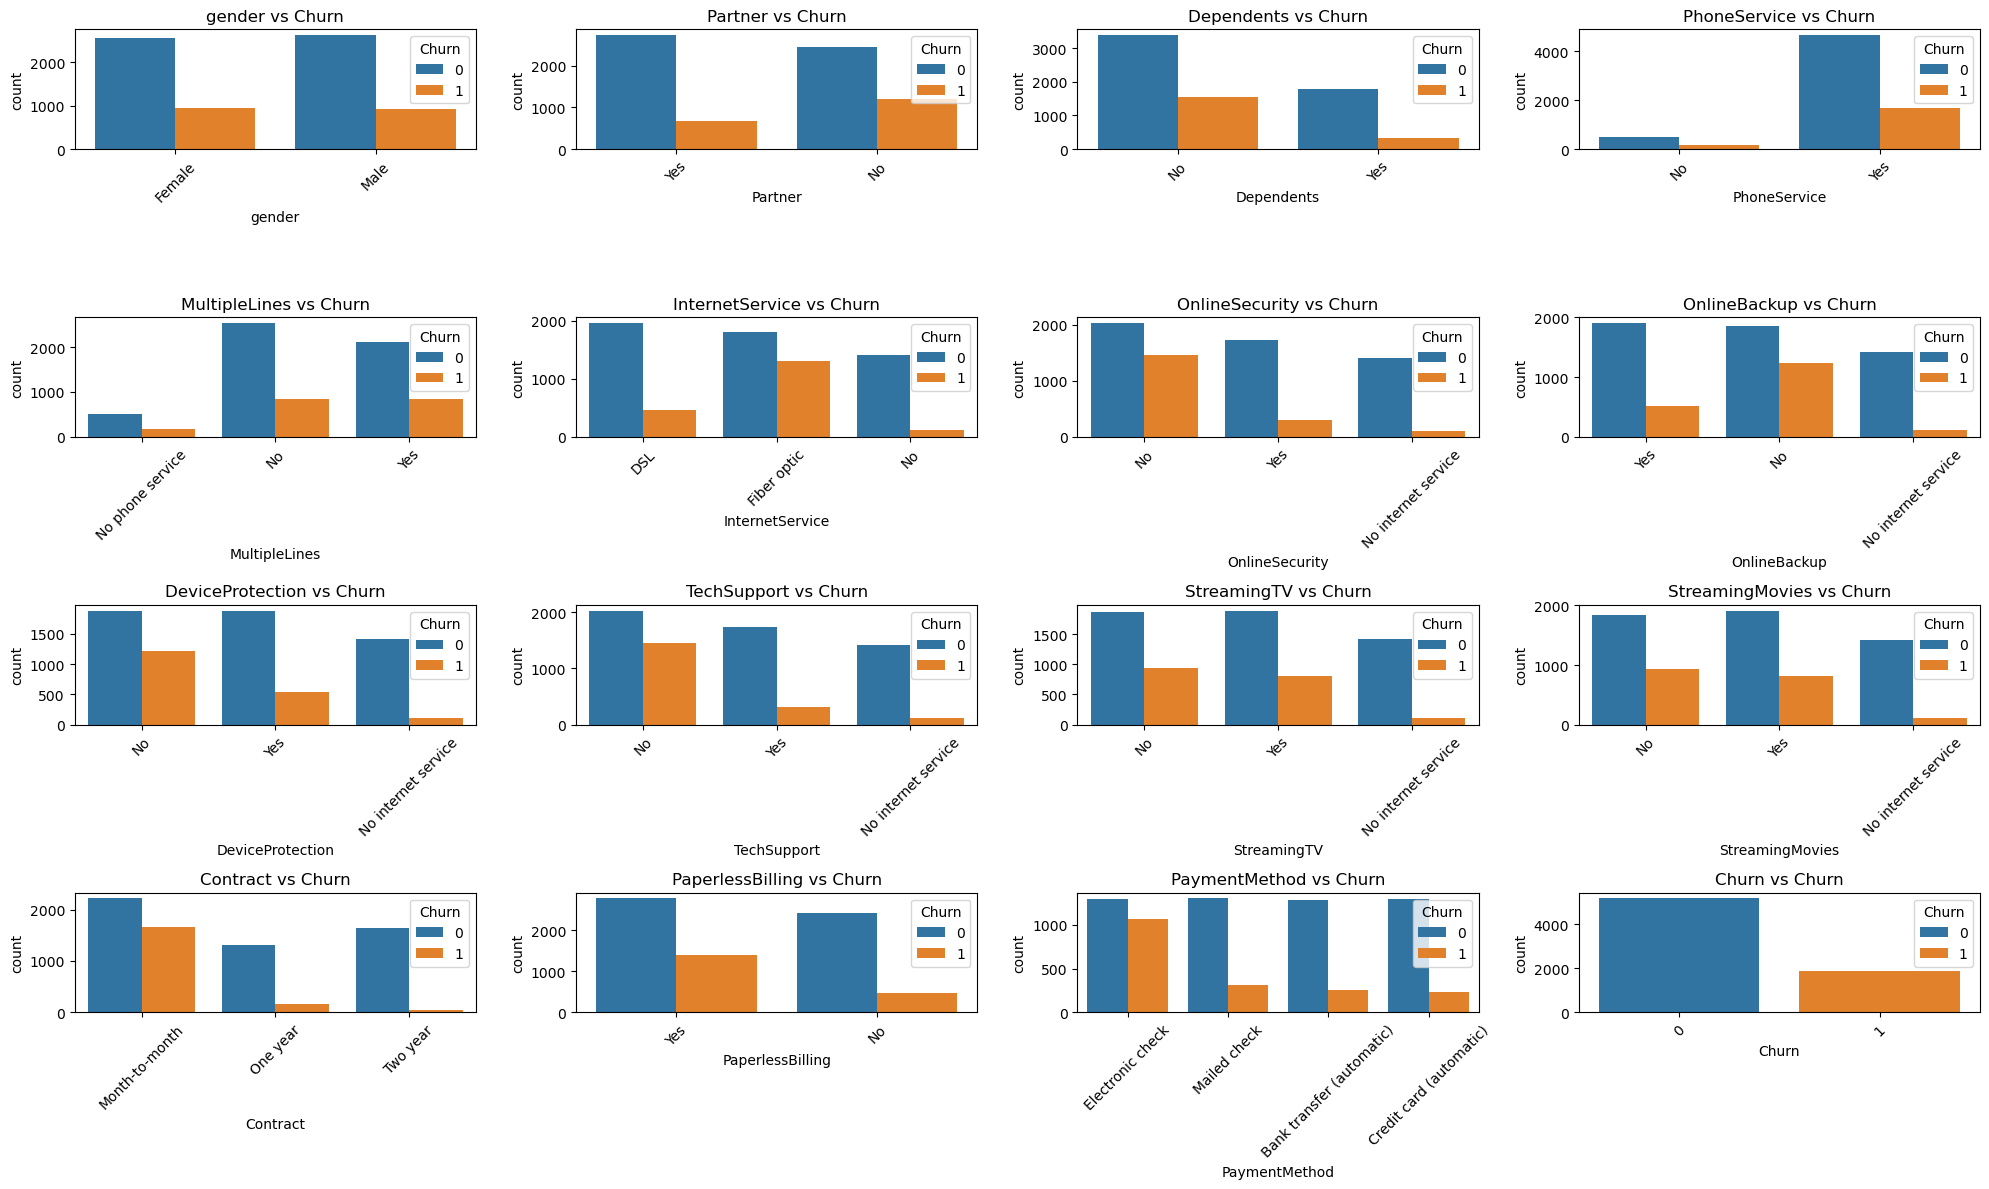

In [18]:
n_cats = len(categorical_cols)
fig, axes = plt.subplots(4, 4, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols[:]):  # Top 6 categorical
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Detailed Churn Insights
- **Higher churn** observed among customers **without dependents**, typically representing **younger segments**.  
- **Fibre optic users** show **increased churn**, especially those **without online security** and **online backup** services.  
- Customers **without device protection** or **tech support** also have a **higher likelihood of churning**.  
- **Month-to-month contract holders** exhibit **greater churn** compared to long-term contracts.  
- In terms of **payment methods**, **electronic check users** experience the **highest churn rates**.  


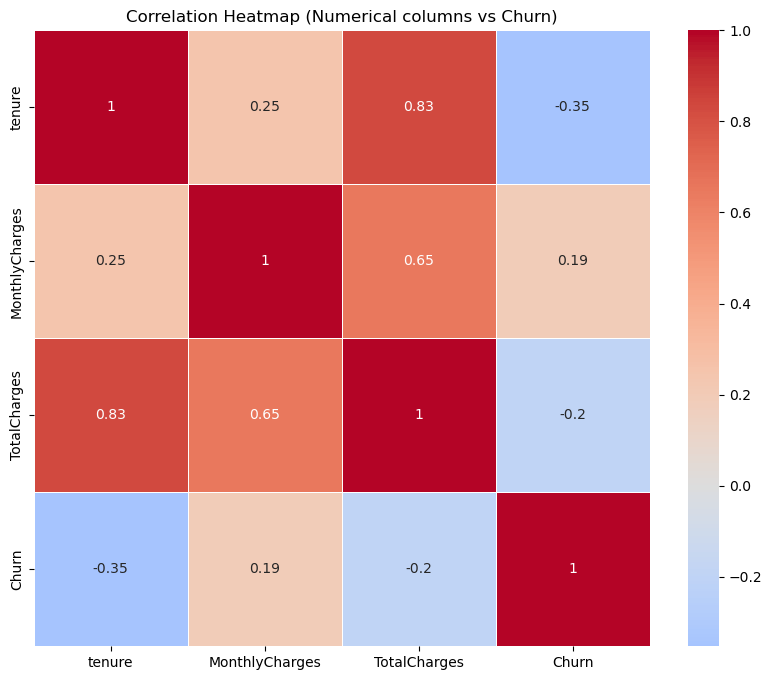

In [19]:
plt.figure(figsize=(10,8))
corr_matrix=df[numeric_cols + ["Churn"]].corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",center=0,square=True,linewidths=0.5)
plt.title("Correlation Heatmap (Numerical columns vs Churn)")
plt.show()

### Correlation Insights
- There is a **strong positive correlation** between **tenure** and **TotalCharges**, indicating that longer-tenured customers accumulate more total charges over time.  
- A **high correlation** also exists between **TotalCharges** and **MonthlyCharges**, as total charges are largely influenced by the recurring monthly fee structure.
- **Tenure and churn** have a **negative correlation**, meaning customers with **longer tenure are less likely to churn**, while **newer customers show higher churn rates**.


In [20]:
print("=== TENURE vs CHURN ===")
monthly_churn=df.groupby("Churn")["MonthlyCharges"].agg(["mean","median","std","count"]).round(2)
print(monthly_churn)


=== TENURE vs CHURN ===
        mean  median    std  count
Churn                             
0      61.27   64.43  31.09   5174
1      74.44   79.65  24.67   1869


In [21]:
print("=== MONTHLY CHARGES vs CHURN ===")
tenure_churn=df.groupby("Churn")["tenure"].agg(["mean","median","std","count"]).round(2)
print(tenure_churn)


=== MONTHLY CHARGES vs CHURN ===
        mean  median    std  count
Churn                             
0      37.57    38.0  24.11   5174
1      17.98    10.0  19.53   1869


In [22]:
#pd.cut() is used to bin continuous numeric values into discrete intervals (categories).

#What pd.cut() does
#It takes a 1D array/Series of numbers and splits them into intervals called “bins”.

#It returns which bin each value belongs to, optionally with custom labels instead of interval ranges.

df['tenure_group'] = pd.cut(df['tenure'], bins=5, labels=['0-12', '13-24', '25-36', '37-48', '49+'])
churn_by_tenure = df.groupby('tenure_group')['Churn'].mean().round(3) * 100
print("\n=== Churn Rate by Tenure Group (%) ===")
print(churn_by_tenure)


=== Churn Rate by Tenure Group (%) ===
tenure_group
0-12     46.4
13-24    26.2
25-36    21.7
37-48    15.0
49+       7.3
Name: Churn, dtype: float64


- Majority of churn is seen in low tenure group of 0-12 months

### Pairplot: Shows correlations between numerical features and churn patterns

In [23]:
pariplot_cols=['tenure','MonthlyCharges','TotalCharges','Churn']

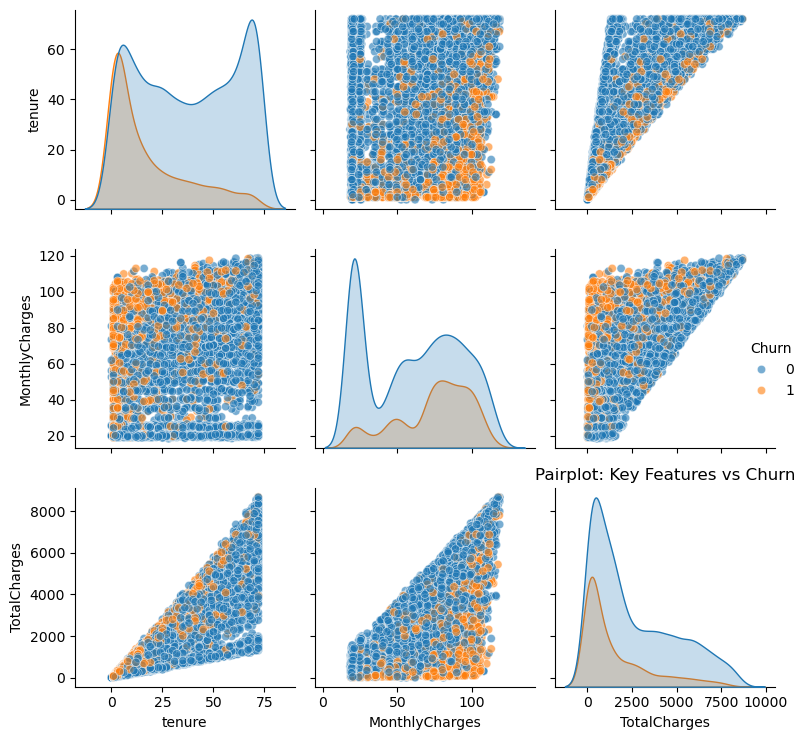

In [24]:
sns.pairplot(df[pariplot_cols],hue='Churn',diag_kind='kde',plot_kws={'alpha':0.6})
plt.title("Pairplot: Key Features vs Churn")
plt.tight_layout()
plt.show()

### Pairplot Insights on Churn
- The **pairplot** reveals that **majority of churn** occurs among customers with **high monthly charges** and **low tenure**.  
- **Higher churn** is also evident when **monthly charges are high** but **total charges remain low**, indicating short-term, high-cost subscribers.  


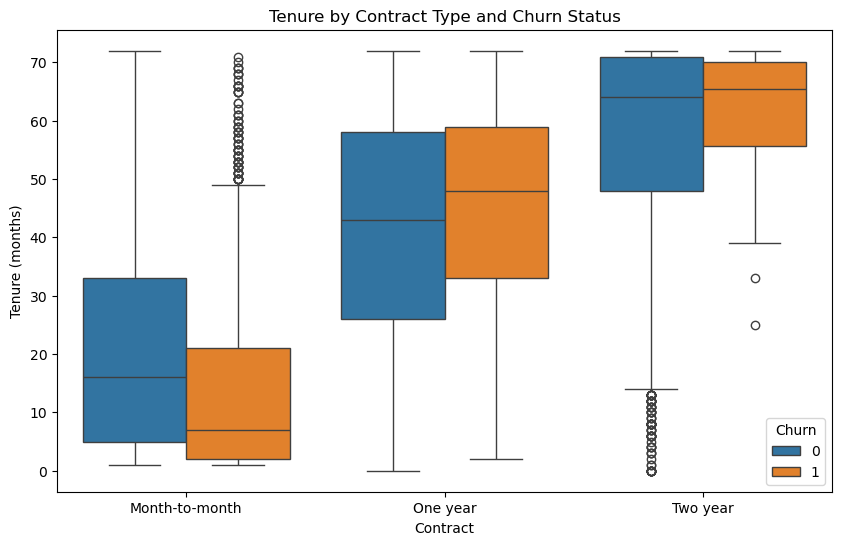

In [25]:
plt.figure(figsize=(10, 6))

# Box plot: Tenure by Contract Type and Churn
sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn')
plt.title('Tenure by Contract Type and Churn Status')
plt.ylabel('Tenure (months)')
plt.show()
plt.close("all")

<Figure size 1000x600 with 0 Axes>

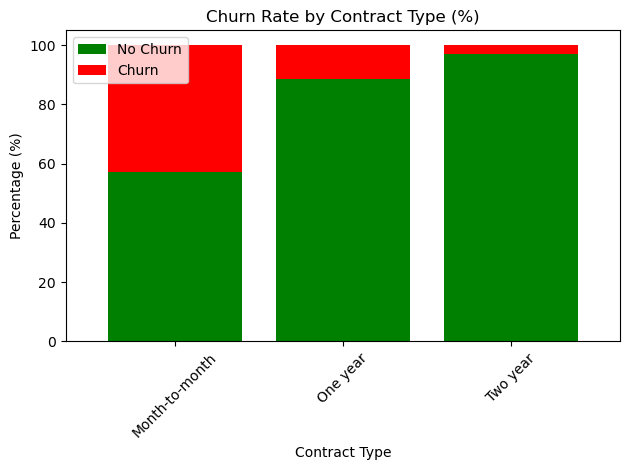

Churn rates by contract:
 Churn              0     1
Contract                  
Month-to-month  57.3  42.7
One year        88.7  11.3
Two year        97.2   2.8


In [26]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

plt.figure(figsize=(10, 6))
contract_churn.plot(kind='bar', stacked=True, color=['green', 'red'], width=0.8)
plt.title('Churn Rate by Contract Type (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Contract Type')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Churn rates by contract:\n", contract_churn.round(1))

In [27]:
print("=== INTERACTION: Contract Type + Tenure + Churn ===")
interaction_summary = df.groupby(['Contract', 'Churn']).agg({
    'tenure': ['mean', 'median', 'count'],
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean'
}).round(2)
print(interaction_summary)

=== INTERACTION: Contract Type + Tenure + Churn ===
                     tenure              MonthlyCharges TotalCharges
                       mean median count           mean         mean
Contract       Churn                                                
Month-to-month 0      21.03   16.0  2220          61.46      1521.93
               1      14.02    7.0  1655          73.02      1164.46
One year       0      41.67   43.0  1307          62.51      2901.35
               1      44.96   48.0   166          85.05      4066.21
Two year       0      56.60   64.0  1647          60.01      3656.65
               1      61.27   65.5    48          86.78      5432.36


#### Segmentation: Identifies customer personas (e.g., high-spend, long-tenure vs. low-spend, new customers)

In [28]:
segmentation_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_seg = df[segmentation_features].copy()

In [29]:
X_seg['TotalCharges'] = pd.to_numeric(X_seg['TotalCharges'], errors='coerce')
X_seg = X_seg.dropna()

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_seg)

In [31]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

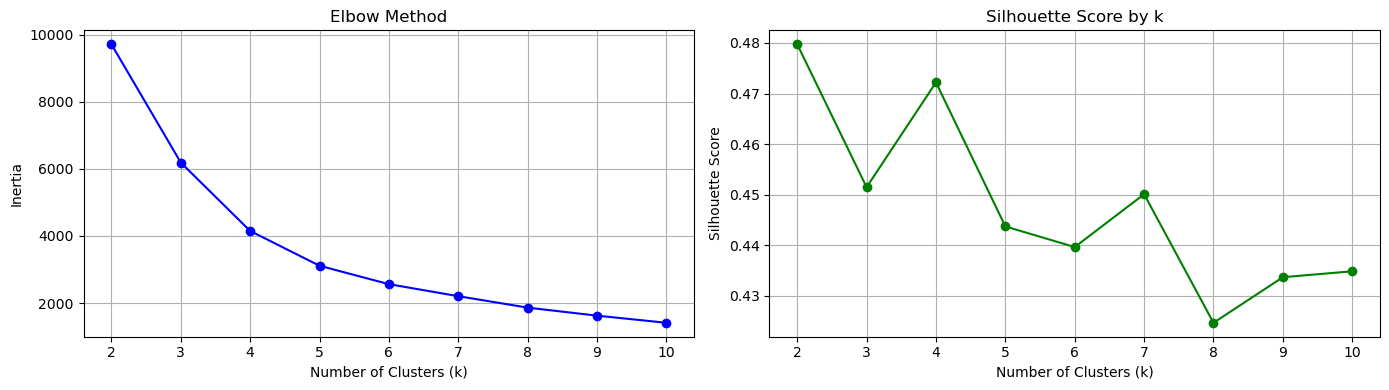

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

axes[1].plot(K_range, silhouette_scores, 'go-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score by k')
axes[1].grid(True)

plt.tight_layout()
plt.show()

- From above 2 is the optimal number of clusters by looking at Elbow method and Silhouette score

In [35]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_seg = X_seg.copy()
df_seg['Cluster'] = kmeans.fit_predict(X_scaled)

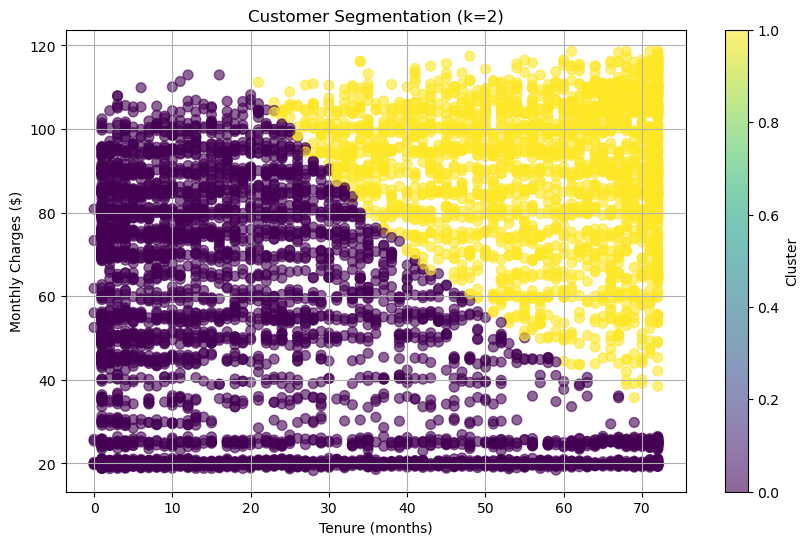

In [36]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_seg['tenure'], df_seg['MonthlyCharges'], 
                     c=df_seg['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.title(f'Customer Segmentation (k={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [37]:
print("\n=== CUSTOMER SEGMENTS ===")
segment_summary = df_seg.groupby('Cluster').agg({
    'tenure': ['mean', 'median'],
    'MonthlyCharges': ['mean', 'median'],
    'TotalCharges': ['mean', 'median']
}).round(2)
print(segment_summary)


=== CUSTOMER SEGMENTS ===
        tenure        MonthlyCharges        TotalCharges         
          mean median           mean median         mean   median
Cluster                                                          
0        20.03   14.0          52.16  50.80       865.67   671.42
1        56.85   60.0          89.76  92.95      5083.90  4913.30


In [38]:
df_seg['Churn'] = df.loc[df_seg.index, 'Churn']
print("\n=== CHURN RATE BY SEGMENT ===")
churn_by_segment = df_seg.groupby('Cluster')['Churn'].mean() * 100
print(churn_by_segment.round(2))


=== CHURN RATE BY SEGMENT ===
Cluster
0    31.38
1    16.94
Name: Churn, dtype: float64


### K=2 Cluster Interpretations

#### Cluster 0: High Churn Risk
- **Characteristics**: **Low tenure**, **high MonthlyCharges**, **low TotalCharges**.  
- **Profile**: Newer customers paying **premium rates** (e.g., **fibre optic**) with minimal accumulated spend.  
- **Behavior**: **Prone to early drop-off** due to **price sensitivity**.  

#### Cluster 1: Loyal/High-Value
- **Characteristics**: **High tenure**, **moderate charges**, **high TotalCharges**.  
- **Profile**: **Long-term subscribers** with **stable billing**.  
- **Behavior**: **Significant lifetime value**, **less likely to churn**.  


## Handle Missing Values

In [39]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

- No missing values in dataset

## Outlier Detection

tenure: 0 outliers detected
MonthlyCharges: 0 outliers detected
TotalCharges: 0 outliers detected


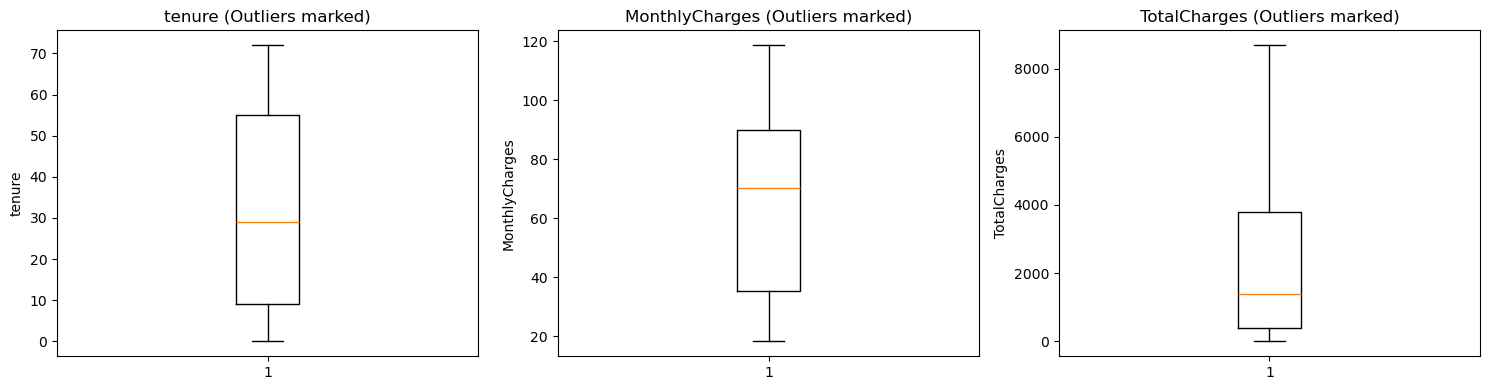

In [40]:
def get_outlier(data,column): 
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_fence=Q1-IQR*Q3
    upper_fence=Q1+IQR*Q3
    return (data[column]<lower_fence) | (data[column]>upper_fence)

outlier_summary={}
for col in numeric_cols: 
    outliers=get_outlier(df,col) 
    outlier_summary[col]=outliers.sum()
    print(f"{col}: {outliers.sum()} outliers detected")

fig,axes=plt.subplots(1,3,figsize=(15,4))
for i,col in enumerate(numeric_cols): 
    axes[i].boxplot(df[col].dropna()) 
    axes[i].set_title(f"{col} (Outliers marked)")
    axes[i].set_ylabel(col)  
plt.tight_layout()
plt.show()

- No outliers are present

In [41]:
## clean_data = data[~((data[column] < lower_bound) | (data[column] > upper_bound))]
# ~ it keeps only non outliers

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12


In [43]:
df1=df.copy()

In [44]:
df1=df1.drop(columns=['customerID'],axis=1)

In [45]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12


In [46]:
df1['gender']=df1['gender'].map({"Male":0,"Female":1})

- encoded male and female as 0 and 1

In [47]:
binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

In [48]:
df1['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [49]:
for col in binary_cols:
    if col in df1.columns:
        df1[col] = df1[col].map({'Yes': 1, 'No': 0})
        print(f"{col}: {df1[col].unique()}")

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
PaperlessBilling: [1 0]


In [50]:
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')  

print(f"Categorical columns to encode: {categorical_cols}")

Categorical columns to encode: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int64   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   int64   
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   int64   
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   int64   
 16  PaymentMethod     7043 n

In [52]:
df1=df1.drop(columns=['tenure_group'],axis=1)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [54]:
len(categorical_cols)

10

## Independent and Dependent Features

In [55]:
X=df1.drop("Churn",axis=1)
y=df1["Churn"]

In [56]:
numerical_cols=X.select_dtypes(include=["int64","float64"]).columns.to_list()
categoric_cols=X.select_dtypes(include="object").columns.to_list()

In [57]:
print(f"Numerical Columns: {numerical_cols}")

Numerical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


In [58]:
print(f"Categorical Columns: {categoric_cols}")

Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


### Applying ColumnTransformer which applies Transformations to both numeric and categoric columns

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline

- StandardScaler applied to numeric data to standardize data
- OneHotEncoder applied to Categorical column

In [60]:
numerical_transformer=StandardScaler()
categoric_transformer=OneHotEncoder(drop='first',sparse_output=False)

In [61]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_cols), 
        ('cat', categoric_transformer,categoric_cols)
    ], 
    remainder="passthrough"
)

In [62]:
X_transformed=preprocessor.fit_transform(X)

In [63]:
print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_transformed.shape}")

Original shape: (7043, 19)
Transformed shape: (7043, 30)


- 30 columns after transformation because of OneHotEncoding of categorical columns

In [64]:
feature_names=preprocessor.get_feature_names_out()
print(f" Feature names after Transformation: {feature_names}")

 Feature names after Transformation: ['num__gender' 'num__SeniorCitizen' 'num__Partner' 'num__Dependents'
 'num__tenure' 'num__PhoneService' 'num__PaperlessBilling'
 'num__MonthlyCharges' 'num__TotalCharges'
 'cat__MultipleLines_No phone service' 'cat__MultipleLines_Yes'
 'cat__InternetService_Fiber optic' 'cat__InternetService_No'
 'cat__OnlineSecurity_No internet service' 'cat__OnlineSecurity_Yes'
 'cat__OnlineBackup_No internet service' 'cat__OnlineBackup_Yes'
 'cat__DeviceProtection_No internet service' 'cat__DeviceProtection_Yes'
 'cat__TechSupport_No internet service' 'cat__TechSupport_Yes'
 'cat__StreamingTV_No internet service' 'cat__StreamingTV_Yes'
 'cat__StreamingMovies_No internet service' 'cat__StreamingMovies_Yes'
 'cat__Contract_One year' 'cat__Contract_Two year'
 'cat__PaymentMethod_Credit card (automatic)'
 'cat__PaymentMethod_Electronic check' 'cat__PaymentMethod_Mailed check']


In [65]:
X_df=pd.DataFrame(X_transformed,columns=feature_names)
print(f"Transformed data:\n{X_df.head()}")

Transformed data:
   num__gender  num__SeniorCitizen  num__Partner  num__Dependents  \
0     1.009559           -0.439916      1.034530        -0.654012   
1    -0.990532           -0.439916     -0.966622        -0.654012   
2    -0.990532           -0.439916     -0.966622        -0.654012   
3    -0.990532           -0.439916     -0.966622        -0.654012   
4     1.009559           -0.439916     -0.966622        -0.654012   

   num__tenure  num__PhoneService  num__PaperlessBilling  num__MonthlyCharges  \
0    -1.277445          -3.054010               0.829798            -1.160323   
1     0.066327           0.327438              -1.205113            -0.259629   
2    -1.236724           0.327438               0.829798            -0.362660   
3     0.514251          -3.054010              -1.205113            -0.746535   
4    -1.236724           0.327438               0.829798             0.197365   

   num__TotalCharges  cat__MultipleLines_No phone service  ...  \
0          -0.

## Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
X_train_transformed=preprocessor.fit_transform(X_train)
X_test_transformed=preprocessor.transform(X_test)

- fit_transform() for train data and transform() for test data to prevent data leakage

In [69]:
print(f"Train Transformed Shape: {X_train_transformed.shape}")
print(f"Test Transformed Shape: {X_test_transformed.shape}")

Train Transformed Shape: (5634, 30)
Test Transformed Shape: (1409, 30)


## RandomForestClassifier applied to get important features from dataset

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
pipeline=Pipeline(
    [("preprocessor",preprocessor), 
    ("classifier",RandomForestClassifier(random_state=42,n_estimators=100))]
)

- Combines preprocessing + model into one unit, preventing data leakage

In [72]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'PaperlessBilling',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [73]:
y_pred=pipeline.predict(X_test)

In [74]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [75]:
y_pred_probability=pipeline.predict_proba(X_test) 
y_pred_probability

array([[0.29, 0.71],
       [0.89, 0.11],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.56, 0.44]])

## Model Evaluation

In [76]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [77]:
print("====Model Performance====")
print(f"ROC-AUC curve: {roc_auc_score(y_test,y_pred_probability[:,1]):.4f}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")
print(f"Confustion Matrix: {confusion_matrix(y_test,y_pred)}")

====Model Performance====
ROC-AUC curve: 0.8387
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.65      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confustion Matrix: [[948  88]
 [206 167]]


### Top 15 Important Features driving Churn

In [78]:
feature_names_array=preprocessor.get_feature_names_out()

In [79]:
feature_importance=pd.Series(
    pipeline.named_steps['classifier'].feature_importances_,
    index=feature_names_array
).sort_values(ascending=False)

In [80]:
print(f"Top 15 IMPORTANT FEATURES : \n{feature_importance.head(15)}")

Top 15 IMPORTANT FEATURES : 
num__TotalCharges                      0.196797
num__tenure                            0.167883
num__MonthlyCharges                    0.167598
cat__PaymentMethod_Electronic check    0.038791
cat__InternetService_Fiber optic       0.038156
cat__Contract_Two year                 0.030435
num__gender                            0.028180
num__PaperlessBilling                  0.026325
cat__OnlineSecurity_Yes                0.025562
num__Partner                           0.024150
cat__Contract_One year                 0.023593
cat__TechSupport_Yes                   0.022914
cat__OnlineBackup_Yes                  0.022066
num__Dependents                        0.020443
cat__MultipleLines_Yes                 0.020017
dtype: float64


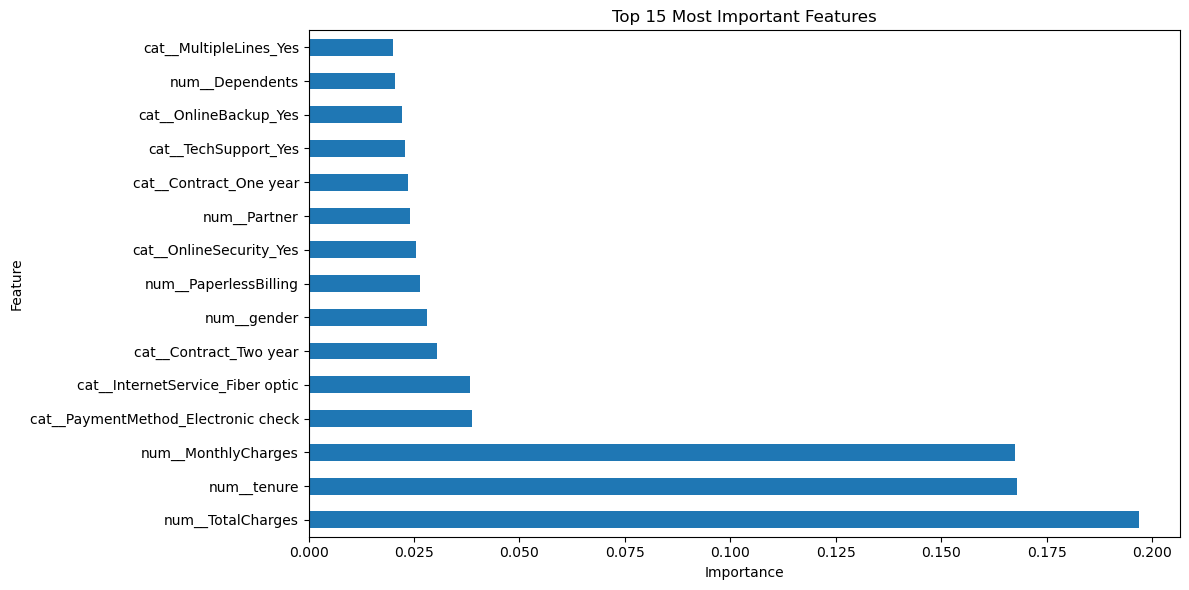

In [81]:
plt.figure(figsize=(12, 6))
feature_importance.head(15).plot(kind='barh')
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Major Churn Drivers
- **Numerical Features**:  
  - `num_TotalCharges`  
  - `num_tenure`  
  - `num_MonthlyCharges`  

- **Categorical Features**:  
  - `cat_PaymentMethod_electronic check`  
  - `cat_InternetService_Fiber optic`  

These five features emerge as the **primary drivers of churn**, highlighting the importance of **billing behavior**, **service type**, and **usage patterns** in customer retention.  


## Feature Selection

### 1. Variance Thresholding

- Features with low variance carry less information
- removes constant or near constant features
- removes features with variance<threshold

In [82]:
from sklearn.feature_selection import VarianceThreshold,chi2,mutual_info_classif

In [83]:
selected_var=VarianceThreshold(threshold=0.01)
X_var_filtered=selected_var.fit_transform(X_df)

In [84]:
selected_features_var=X_df.columns[selected_var.get_support()].to_list()

In [85]:
removed_features_var=X_df.columns[~selected_var.get_support()].to_list()

In [86]:
print("Variances of each feature:")
variances=X_df.var()
print(variances.sort_values(ascending=False).head(10))

Variances of each feature:
num__gender                         1.000142
num__PaperlessBilling               1.000142
num__Dependents                     1.000142
num__Partner                        1.000142
num__tenure                         1.000142
num__MonthlyCharges                 1.000142
num__TotalCharges                   1.000142
num__PhoneService                   1.000142
num__SeniorCitizen                  1.000142
cat__InternetService_Fiber optic    0.246385
dtype: float64


In [87]:
print(f"Features Removed(low variance): {removed_features_var}")
print(f"Features Retained: {len(selected_features_var)} out of {X_df.shape[1]}")
print(f"New shape after variance filtering: {X_var_filtered.shape}")

Features Removed(low variance): []
Features Retained: 30 out of 30
New shape after variance filtering: (7043, 30)


#### All features are retained

### 2. Mutual Information

- Measures dependency between feature and target
- works with both categoric and numeric features
- Higher MI=Stronger dependency on target
- Identifies which feature has stronger relationship with churn 

In [88]:
X_df['num__TotalCharges']=X_df['num__TotalCharges'].fillna(0)

In [89]:
mi_scores=mutual_info_classif(X_df,y,random_state=42)
mi_df=pd.DataFrame({
    "Feature":X_df.columns,
    "MI_score":mi_scores
}).sort_values('MI_score',ascending=False)

In [90]:
print("Top 15 features by Mutual Information: ")
print(mi_df.head(15))

Top 15 features by Mutual Information: 
                                      Feature  MI_score
4                                 num__tenure  0.076320
26                     cat__Contract_Two year  0.057954
11           cat__InternetService_Fiber optic  0.054066
7                         num__MonthlyCharges  0.051238
12                    cat__InternetService_No  0.044575
8                           num__TotalCharges  0.043645
28        cat__PaymentMethod_Electronic check  0.043210
13    cat__OnlineSecurity_No internet service  0.040600
15      cat__OnlineBackup_No internet service  0.040024
17  cat__DeviceProtection_No internet service  0.034920
23   cat__StreamingMovies_No internet service  0.031759
19       cat__TechSupport_No internet service  0.027452
21       cat__StreamingTV_No internet service  0.026352
1                          num__SeniorCitizen  0.025085
25                     cat__Contract_One year  0.024191


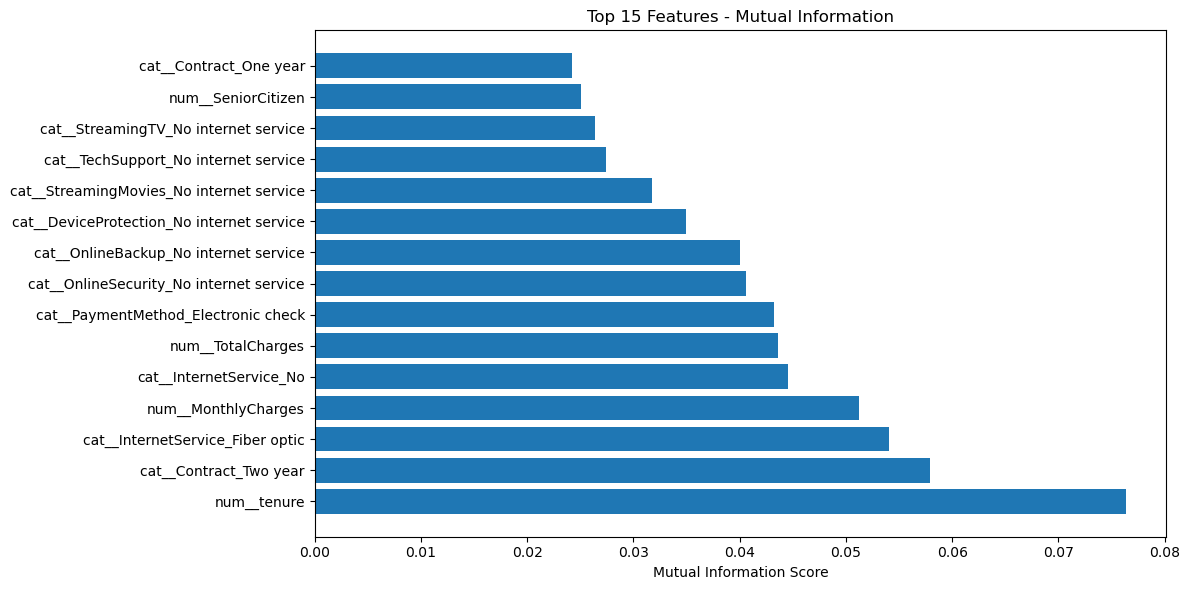

In [91]:
plt.figure(figsize=(12, 6))
plt.barh(mi_df['Feature'][:15], mi_df['MI_score'][:15])
plt.xlabel('Mutual Information Score')
plt.title('Top 15 Features - Mutual Information')
plt.tight_layout()
plt.show()

In [92]:
top_k_mi = mi_df['Feature'].head(10).tolist()
print(f"\nTop 10 features selected by MI: {top_k_mi}\n")


Top 10 features selected by MI: ['num__tenure', 'cat__Contract_Two year', 'cat__InternetService_Fiber optic', 'num__MonthlyCharges', 'cat__InternetService_No', 'num__TotalCharges', 'cat__PaymentMethod_Electronic check', 'cat__OnlineSecurity_No internet service', 'cat__OnlineBackup_No internet service', 'cat__DeviceProtection_No internet service']



### 3. CHI-SQUARE

- Measures independence between categorical features and target
- Only for categorical/non-negative features (0 to infinity scale)
- Higher chi-square = stronger assosciation with target
- Tests relationship between categories and churn

In [93]:
X_nonneg=X_df.copy()
X_nonneg=X_nonneg.clip(lower=0)

In [94]:
chi2_scores,chi2_pvalues=chi2(X_nonneg,y)
chi2_df=pd.DataFrame({
    "Feature":X_df.columns,
    "Chi2_Score":chi2_scores, 
    "P_values":chi2_pvalues
}).sort_values("Chi2_Score",ascending=False)

In [95]:
print("Top 15 Features by Chi-Squares:")
print(chi2_df.head(15))

Top 15 Features by Chi-Squares:
                                      Feature  Chi2_Score       P_values
26                     cat__Contract_Two year  488.578090  2.905390e-108
4                                 num__tenure  467.658249  1.035985e-103
28        cat__PaymentMethod_Electronic check  426.422767   9.760677e-95
11           cat__InternetService_Fiber optic  374.476216   1.984260e-83
1                          num__SeniorCitizen  305.402382   2.191839e-68
12                    cat__InternetService_No  286.520193   2.849642e-64
17  cat__DeviceProtection_No internet service  286.520193   2.849642e-64
19       cat__TechSupport_No internet service  286.520193   2.849642e-64
23   cat__StreamingMovies_No internet service  286.520193   2.849642e-64
21       cat__StreamingTV_No internet service  286.520193   2.849642e-64
13    cat__OnlineSecurity_No internet service  286.520193   2.849642e-64
15      cat__OnlineBackup_No internet service  286.520193   2.849642e-64
8                  

In [96]:
significant_features_chi2 = chi2_df[chi2_df['P_values'] < 0.05]['Feature'].tolist()
print(f"\nStatistically significant features (p < 0.05): {len(significant_features_chi2)} features")
print(significant_features_chi2[:10])


Statistically significant features (p < 0.05): 27 features
['cat__Contract_Two year', 'num__tenure', 'cat__PaymentMethod_Electronic check', 'cat__InternetService_Fiber optic', 'num__SeniorCitizen', 'cat__InternetService_No', 'cat__DeviceProtection_No internet service', 'cat__TechSupport_No internet service', 'cat__StreamingMovies_No internet service', 'cat__StreamingTV_No internet service']


In [97]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_df, y)

RandomForestClassifier(random_state=42)

In [98]:
model_importance = pd.DataFrame({
    'Feature': X_df.columns,
    'Model_Importance': rf_model.feature_importances_
}).sort_values('Model_Importance', ascending=False)

In [99]:
print("Top 15 features by Random Forest importance:")
print(model_importance.head(15))

Top 15 features by Random Forest importance:
                                Feature  Model_Importance
8                     num__TotalCharges          0.199938
4                           num__tenure          0.171046
7                   num__MonthlyCharges          0.169772
28  cat__PaymentMethod_Electronic check          0.039595
11     cat__InternetService_Fiber optic          0.038366
0                           num__gender          0.027842
26               cat__Contract_Two year          0.027414
6                 num__PaperlessBilling          0.025995
14              cat__OnlineSecurity_Yes          0.024544
25               cat__Contract_One year          0.023284
2                          num__Partner          0.023085
20                 cat__TechSupport_Yes          0.022841
1                    num__SeniorCitizen          0.021140
16                cat__OnlineBackup_Yes          0.020687
3                       num__Dependents          0.019775


In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = list(X_df.columns)

def debug_missing(source_df, source_name, feature_col_name):
    # source_df expected to have columns ['Feature', feature_col_name]
    missing = set(features) - set(source_df['Feature'])
    if missing:
        print(f"WARN: {len(missing)} features from X_df missing in {source_name}. Example missing (up to 10):")
        print(list(missing)[:10])
    else:
        print(f"OK: All X_df features present in {source_name}.")

# Run diagnostics
debug_missing(mi_df, "mi_df", "MI_score")
debug_missing(chi2_df, "chi2_df", "Chi2_Score")
debug_missing(model_importance, "model_importance", "Model_Importance")

# Helper to get a scaled numpy 1D array aligned to features
def get_scaled_aligned(source_df, value_col, fill_value=0.0):
    # Build a Series indexed by Feature then reindex to features list
    s = source_df.set_index('Feature')[value_col].reindex(features)
    # Fill missing values (change policy here if you'd rather keep NaN)
    s = s.fillna(fill_value)
    # Scale (MinMaxScaler expects 2D input)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(s.values.reshape(-1, 1)).flatten()
    return scaled

# Create comparison DataFrame using reindex/fill/scale
comparison_df = pd.DataFrame({
    'Feature': features,
    'Mutual_Info': get_scaled_aligned(mi_df, 'MI_score', fill_value=0.0),
    'Chi_Square': get_scaled_aligned(chi2_df, 'Chi2_Score', fill_value=0.0),
    'Model_Importance': get_scaled_aligned(model_importance, 'Model_Importance', fill_value=0.0),
})

# Calculate average score across all methods
comparison_df['Average_Score'] = comparison_df[['Mutual_Info', 'Chi_Square', 'Model_Importance']].mean(axis=1)
comparison_df = comparison_df.sort_values('Average_Score', ascending=False).reset_index(drop=True)

print("\nTop 15 features across all methods (normalized 0-1):")
print(comparison_df.head(15).round(3))


OK: All X_df features present in mi_df.
OK: All X_df features present in chi2_df.
OK: All X_df features present in model_importance.

Top 15 features across all methods (normalized 0-1):
                                      Feature  Mutual_Info  Chi_Square  \
0                                 num__tenure        1.000       0.957   
1                           num__TotalCharges        0.572       0.445   
2                      cat__Contract_Two year        0.759       1.000   
3                         num__MonthlyCharges        0.671       0.150   
4            cat__InternetService_Fiber optic        0.708       0.766   
5         cat__PaymentMethod_Electronic check        0.566       0.873   
6                     cat__InternetService_No        0.584       0.586   
7     cat__OnlineSecurity_No internet service        0.532       0.586   
8       cat__OnlineBackup_No internet service        0.524       0.586   
9   cat__DeviceProtection_No internet service        0.458       0.586   

<Figure size 1400x800 with 0 Axes>

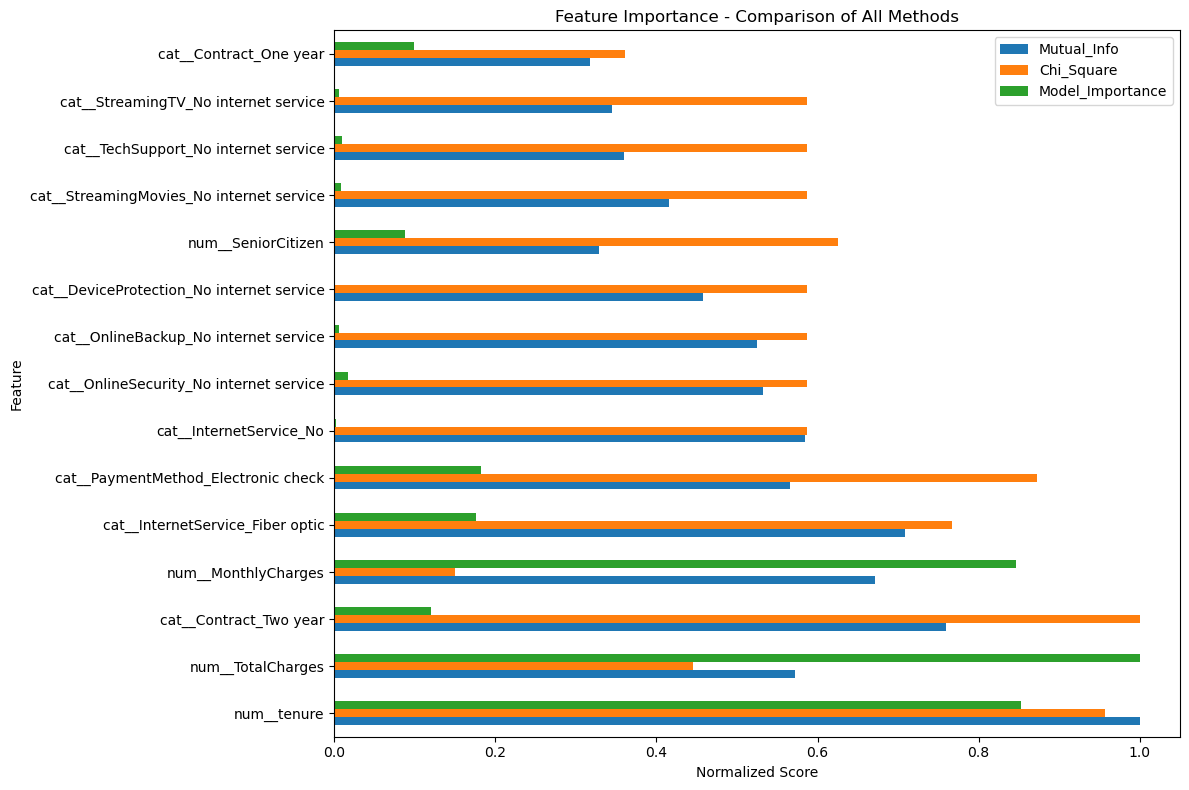

In [101]:
plt.figure(figsize=(14, 8))
comparison_top = comparison_df.head(15).set_index('Feature')
comparison_top[['Mutual_Info', 'Chi_Square', 'Model_Importance']].plot(
    kind='barh', figsize=(12, 8)
)
plt.xlabel('Normalized Score')
plt.title('Feature Importance - Comparison of All Methods')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [102]:
print("\n" + "=" * 60)
print("FINAL RECOMMENDATION: Top Features for Model")
print("=" * 60)

# Select features that rank high in at least 2-3 methods
top_features_consensus = comparison_df[comparison_df['Average_Score'] > comparison_df['Average_Score'].quantile(0.75)]['Feature'].tolist()

print(f"\nTop {len(top_features_consensus)} features recommended for final model:")
for i, feat in enumerate(top_features_consensus, 1):
    print(f"{i}. {feat}")



FINAL RECOMMENDATION: Top Features for Model

Top 8 features recommended for final model:
1. num__tenure
2. num__TotalCharges
3. cat__Contract_Two year
4. num__MonthlyCharges
5. cat__InternetService_Fiber optic
6. cat__PaymentMethod_Electronic check
7. cat__InternetService_No
8. cat__OnlineSecurity_No internet service


In [103]:
X_final = X_df[top_features_consensus]  
X_final['num__SeniorCitizen']=X_df['num__SeniorCitizen']
X_final

,num__tenure,num__TotalCharges,cat__Contract_Two year,num__MonthlyCharges,cat__InternetService_Fiber optic,cat__PaymentMethod_Electronic check,cat__InternetService_No,cat__OnlineSecurity_No internet service,num__SeniorCitizen
0,-1.277445,-0.992611,0.0,-1.160323,0.0,1.0,0.0,0.0,-0.439916
1,0.066327,-0.172165,0.0,-0.259629,0.0,0.0,0.0,0.0,-0.439916
2,-1.236724,-0.958066,0.0,-0.362660,0.0,0.0,0.0,0.0,-0.439916
3,0.514251,-0.193672,0.0,-0.746535,0.0,0.0,0.0,0.0,-0.439916
4,-1.236724,-0.938874,0.0,0.197365,1.0,1.0,0.0,0.0,-0.439916
...,...,...,...,...,...,...,...,...,...
7038,-0.340876,-0.127605,0.0,0.665992,0.0,0.0,0.0,0.0,-0.439916
7039,1.613701,2.242606,0.0,1.277533,1.0,0.0,0.0,0.0,-0.439916
7040,-0.870241,-0.852932,0.0,-1.168632,0.0,1.0,0.0,0.0,-0.439916
7041,-1.155283,-0.870513,0.0,0.320338,1.0,0.0,0.0,0.0,2.273159


In [104]:

print(f"\nFinal dataset shape: {X_final.shape} (reduced from {X_df.shape[1]})")

# Train model with selected features
rf_final = RandomForestClassifier(random_state=42, n_estimators=100)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_final, X_final, y, cv=5, scoring='roc_auc')
print(f"\nCross-validation ROC-AUC with selected features: {scores.mean():.4f} (+/- {scores.std():.4f})")


Final dataset shape: (7043, 9) (reduced from 30)

Cross-validation ROC-AUC with selected features: 0.7994 (+/- 0.0097)


In [105]:
def evaluate_model(true, predicted):
    roc_auc = roc_auc_score(true, predicted)
    recall = recall_score(true, predicted)
    precision = precision_score(true,predicted)
    F1_score = f1_score(true, predicted)
    return roc_auc,recall,precision,F1_score

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [117]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix

In [107]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_final,y,test_size=0.2,random_state=42)

In [118]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Regressor": AdaBoostClassifier()
}
model_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_new, y_train_new) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_new)
    y_test_pred = model.predict(X_test_new)
    
    # Evaluate Train and Test dataset
    model_train_roc_auc , model_train_roc_auc, model_train_precision,model_train_f1_score = evaluate_model(y_train_new, y_train_pred)

    model_test_roc_auc , model_test_recall, model_test_precision,model_test_f1_score = evaluate_model(y_test_new, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- ROC_AUC: {:.4f}".format(model_train_roc_auc))
    print("- Recall score: {:.4f}".format(model_train_roc_auc))
    print("- Precision Score: {:.4f}".format(model_train_precision))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- ROC_AUC: {:.4f}".format(model_test_roc_auc))
    print("- MRecall score: {:.4f}".format(model_test_roc_auc))
    print("- Precision Score: {:.4f}".format(model_test_roc_auc))
    print("- F1 Score: {:.4f}".format(model_test_roc_auc))
    
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- ROC_AUC: 0.4953
- Recall score: 0.4953
- Precision Score: 0.6517
- F1 Score: 0.5629
----------------------------------
Model performance for Test set
- ROC_AUC: 0.7171
- MRecall score: 0.7171
- Precision Score: 0.7171
- F1 Score: 0.7171


K-Neighbors Classifier
Model performance for Training set
- ROC_AUC: 0.6250
- Recall score: 0.6250
- Precision Score: 0.7409
- F1 Score: 0.6780
----------------------------------
Model performance for Test set
- ROC_AUC: 0.6931
- MRecall score: 0.6931
- Precision Score: 0.6931
- F1 Score: 0.6931


Decision Tree
Model performance for Training set
- ROC_AUC: 0.9806
- Recall score: 0.9806
- Precision Score: 0.9953
- F1 Score: 0.9879
----------------------------------
Model performance for Test set
- ROC_AUC: 0.6603
- MRecall score: 0.6603
- Precision Score: 0.6603
- F1 Score: 0.6603


Random Forest Classifier
Model performance for Training set
- ROC_AUC: 0.9880
- Recall score: 0.9880
- Precision Sc

In [121]:
df1.to_csv("Churn_prediction_cleaned.csv")